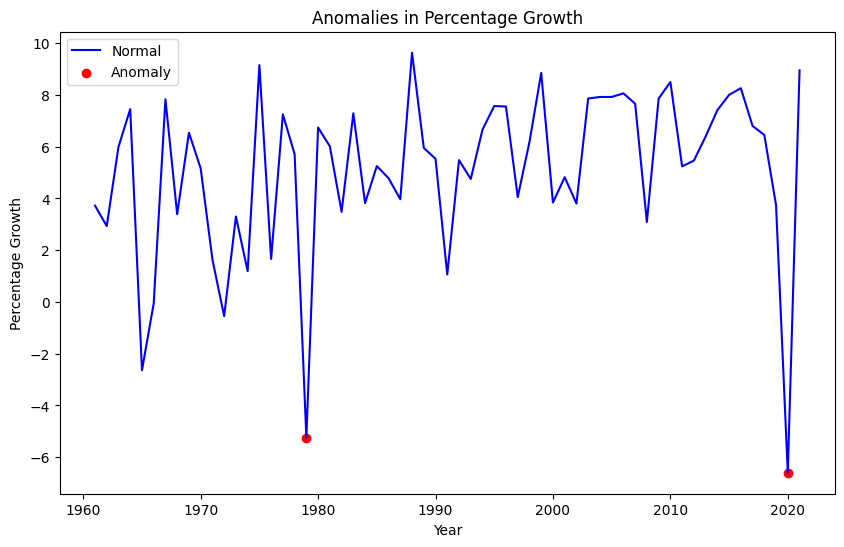

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define the column names
column_names = ['Year', 'GDP_In_Billion_USD', 'Per_Capita_in_USD', 'Percentage_Growth']

# Read the time series data from the CSV file, skipping the first row
df = pd.read_csv('/content/India_GDP_Data.csv', header=None, skiprows=1, names=column_names)

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Handle missing values in 'Percentage_Growth'
df['Percentage_Growth'] = df['Percentage_Growth'].fillna(df['Percentage_Growth'].median())

# Calculate the Z-score of 'Percentage_Growth'
df['z_score'] = np.abs(stats.zscore(df['Percentage_Growth']))

# Define a threshold for anomalies
threshold = 3  # Change as needed

# Identify anomalies
df['anomaly'] = df['z_score'] > threshold

# Plot the 'Percentage_Growth' and the anomalies
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Percentage_Growth'], color='blue', label = 'Normal')
plt.scatter(df.loc[df['anomaly'], 'Year'], df.loc[df['anomaly'], 'Percentage_Growth'], color='red', label = 'Anomaly')
plt.legend()
plt.title('Anomalies in Percentage Growth')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.show()


In [2]:
# Print the rows with the anomalies
print(df[df['anomaly']])


         Year  GDP_In_Billion_USD  Per_Capita_in_USD  Percentage_Growth  \
1  2020-01-01             2667.69               1933              -6.60   
42 1979-01-01              152.99                224              -5.24   

     z_score  anomaly  
1   3.590433     True  
42  3.172703     True  
